# Discrete call-option pricing model

The goal of this assignment is formulate a script that correctly prices discrete call options.

The main extension to the model is to analyze how an investor could combine the asset and the risk-free asset to replicate the option.

### NB! The extension is only viable if the market is arbitrage-free and complete, which will be explained during the script


## Option value

For a market $(\Omega , \mathbb{P})$ where the market states are defined as $\Omega = ({w_{1} , w_{2} , ... , w_{s}})$ an option has different prices at different times $t$.

The options initial price $S_{0}$ can either go up $S_{up}$ or down $S_{down}$ with a given probability. 
The up and down prices at time $t$ depends on the factors $u , d$ , which are defined as follows:

### $u = \exp^{\sigma \cdot \sqrt({t}/{n})}$ , $d = \exp^{-\sigma \cdot \sqrt({t}/{n})} = 1 / u$

These state-factors combined with the interest rate $R = (1+r)$ makes it possible to calculate the $q$ probability defined as:

### $q = \frac{(R - u)}{(u - d)}$

For a call option the option value depends on the strike price, and the option value in a certain state can be defined as : 

### $C_{u} = (uS_{0}-K)^+$ , $C_{d} = (dS_{0}-K)^+$

All these equations can be combined to find the option value at $t=0$ denoted as $C_{0}$

### $C_{0} = \frac{1}{R} \cdot (q\cdot C_{u} + (1-q)\cdot C_{d})$

## No arbitrage and complete market?

If the market is complete and arbitrage-free, an investor is able to replicate the option by allocating between the asset and risk-free asset. 

It is therefore beneficial to examine whether or not the market is complete and arbitrage-free. 

A market $(\Omega , \mathbb{P})$ is arbitrage-free and complete if the probability measure $q\in [0 , 1]$ and $\sum q_{i} = 1$.

This ensures that q is the unconditional martingale-measure and makes the market Arbitrage-free and complete. 

A quick way in our framework to test whether the market is Arbitrage-free and complete is to examine if $u>R>d$.

To replicate the option in an arbitrage-free and complete market (2-period) , we need to know the price-vector $\pi$ and payment matrix $D^T$ which are defined as the following, note that these definitions can be extended to further dimensions:

$\pi = \begin{bmatrix}
C_{u} \\\
C_{d}
\end{bmatrix} , $ $D^T = \begin{bmatrix}
S_{1u} & R \\\
S_{1d} & R
\end{bmatrix} $

To replcate the option you have to multiply the inverse payment matrix with the price vector : 

$\Phi = (D^T)^{-1}\cdot \pi = \begin{bmatrix}
Assets \\\
Risk free
\end{bmatrix} $


In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sp

In [29]:
def option_tree(N , T , S0 , sigma , r , K , array_out=False):

    """This function generates a price-tree , option-pricing-tree and returns option price at time t = 0
        "array_out = False" will only show the option price a t = 0. 
        "Array_out = True" will show details from function"""

#======================================================

    # Defining variables
    global price_tree , option , R
    dt = T / N                      # Expiration time / periods
    u = np.exp(sigma * np.sqrt(dt)) # Up-state
    d = 1/u                         # Down-State
    R = 1 + r                       # Interest
    q = (R - d) / (u - d)           # q-prob

#=======================================================

    # Price-Tree
    price_tree = np.zeros([N+1 , N+1]) # Empty grid

    for i in range(N + 1):
        for j in range(i + 1):
            price_tree[j , i] = S0 * (d ** j) * (u ** (i - j)) # Generating prices in grid

#=======================================================

    # Option value
    option = np.zeros([N + 1 , N + 1])
    option[: , N] = np.maximum(np.zeros(N + 1) , price_tree[: , N] - K) # Finds max when strike price has been accounted for

#=======================================================

    # Calculates option price at t = 0
    for i in np.arange(N - 1 , -1 , -1):
        for j in np.arange(0 , i + 1):
            option[j , i] = (1 / R) * (q * option[j , i + 1] + (1 - q) * option[j + 1 , i + 1]) # Calculates C0

#=======================================================
    answer1 = "The model is Arbitrage-free and complete"
    answer2 = "The model is not Arbitrage-free or complete, replication NOT possible"

    # Return the price
    if array_out:
        if u > R > d:
            return [str(answer1) , option[0 , 0] , price_tree , option] 
        else:
            return [str(answer2) , option[0 , 0] , price_tree , option] 
    else:
        return option[0 , 0]

In [30]:
#Calling the function by selecting parameters
option_tree(2 , 2 , 50 , 0.182575441 , 0.05 , 45 , True)

['The model is Arbitrage-free and complete',
 10.74842362739621,
 array([[50.        , 60.01523499, 72.03656861],
        [ 0.        , 41.6560895 , 50.        ],
        [ 0.        ,  0.        , 34.70459585]]),
 array([[10.74842363, 17.15809213, 27.03656861],
        [ 0.        ,  2.81264011,  5.        ],
        [ 0.        ,  0.        ,  0.        ]])]

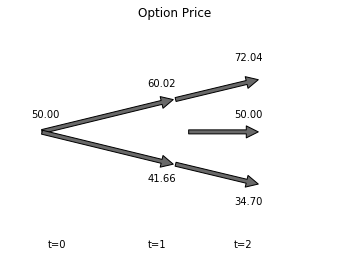

In [48]:
#Plotting Option price
plt.xlim(0,1) 
plt.figtext(0.18,0.55,"{:.2f}".format((price_tree[0 , 0])))
plt.figtext(0.22,0.1,"t=0")
plt.figtext(0.45,0.1,"t=1")
plt.figtext(0.65,0.1,"t=2")
plt.figtext(0.45,0.5+0.16,"{:.2f}".format((price_tree[0 , 1])))
plt.figtext(0.45,0.5-0.17,"{:.2f}".format((price_tree[1 , 1])))
plt.figtext(0.65,0.5+0.25,"{:.2f}".format((price_tree[0 , 2])))
plt.figtext(0.65,0.5+0.05,"{:.2f}".format((price_tree[1 , 2])))
plt.figtext(0.65,0.5-0.25,"{:.2f}".format((price_tree[2 , 2])))

plt.annotate('',xy=(0.5,0.5+0.15), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.01))
plt.annotate('',xy=(0.5,0.5-0.15), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.01))
plt.annotate('',xy=(0.75,0.5+0.24), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.62))
plt.annotate('',xy=(0.75,0.5-0.24), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.62))
plt.annotate('',xy=(0.75,.5), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.68))
plt.title('Option Price')
plt.axis('off')
plt.show()

### The middle arrow shows if the price goes up then down, or down then up

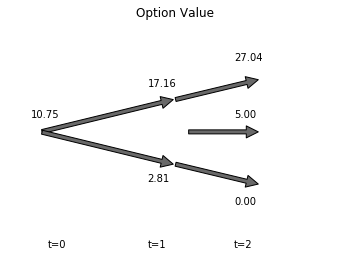

In [49]:
#Plotting Option Value
plt.xlim(0,1) 
plt.figtext(0.18,0.55,"{:.2f}".format((option[0 , 0])))
plt.figtext(0.22,0.1,"t=0")
plt.figtext(0.45,0.1,"t=1")
plt.figtext(0.65,0.1,"t=2")
plt.figtext(0.45,0.5+0.16,"{:.2f}".format((option[0 , 1])))
plt.figtext(0.45,0.5-0.17,"{:.2f}".format((option[1 , 1])))
plt.figtext(0.65,0.5+0.25,"{:.2f}".format((option[0 , 2])))
plt.figtext(0.65,0.5+0.05,"{:.2f}".format((option[1 , 2])))
plt.figtext(0.65,0.5-0.25,"{:.2f}".format((option[2 , 2])))

plt.annotate('',xy=(0.5,0.5+0.15), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.01))
plt.annotate('',xy=(0.5,0.5-0.15), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.01))
plt.annotate('',xy=(0.75,0.5+0.24), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.62))
plt.annotate('',xy=(0.75,0.5-0.24), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.62))
plt.annotate('',xy=(0.75,.5), xytext=(0.1,0.5), arrowprops=dict(facecolor='dimgrey',shrink=0.68))
plt.title('Option Value')
plt.axis('off')
plt.show()

### The middle arrow shows if the value goes up then down, or down then up

## Replicating option by mixing asset and risk-free asset

In [47]:
pi = sp.Matrix([[option[0 , 1]] , [option[1 , 1]]]) # price-vector
Dt = sp.Matrix([[price_tree[0 , 1] , R] , [price_tree[1 , 1] , R]]) # payment matrix

Dti = Dt**-1 # Inverting the payment matrix

phi = Dti * pi

display(phi)

# Check if the calculations are correct

display(Dt * phi) # Should be equal to the price-vector

Matrix([
[0.781379069461348],
[-28.3205298456712]])

Matrix([
[17.1580921290992],
[2.81264011359925]])